In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-02/05-20-24/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. corner: 0.1510
	2. angle: 0.1109
	3. triangular: 0.1088
	4. quadratic: 0.1085
	5. turn: 0.0844
	6. outline: 0.0743
	7. unrotate: 0.0717
	8. color: 0.0712
	9. right: 0.0706
	10. static: 0.0633
	11. unturn: 0.0628
	12. blank: 0.0624
	13. white: 0.0621
	14. in: 0.0573
	15. figure: 0.0549
	16. rotate: 0.0518
	17. up: 0.0514
	18. locate: 0.0500
	19. picture: 0.0491
	20. fix: 0.0422
	21. position: 0.0388
	22. is: 0.0324
	23. left: 0.0321
	24. solid: 0.0247
	25. transparent: 0.0230
	26. with: 0.0174
	27. circular: 0.0160
	28. bottom: 0.0159
	29. image: 0.0158
	30. olive: 0.0156
	31. shape: 0.0085
	32. blue: 0.0036
	33. four: 0.0024
	34. canvas: 0.0015
	35. red: 0.0013
	36. form: 0.0009
	37. round: 0.0003
	38. azure: 0.0001
	39. scarlet: 0.0001
	40. <pad>: 0.0000
	41. photo: 0.0000
	42. this: 0.0000
	43. that: 0.0000
	44. shade: 0.0000
	45. have: 0.0000
	46. lime: 0.0000
	47. no: 0.0000
	48. cyan: 0.0000
	49. crimson: 0.0000
	50. bac

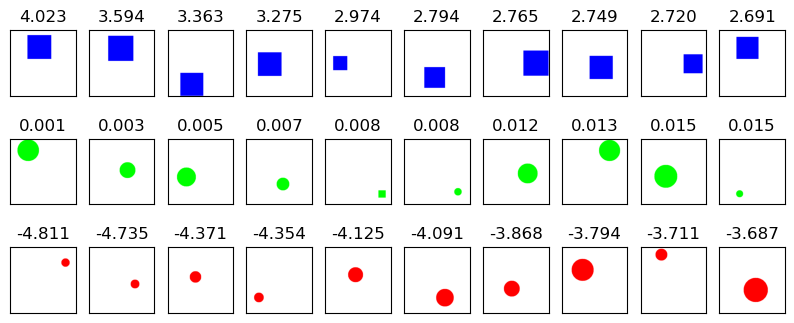

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. shade: 0.1891
	2. photo: 0.1803
	3. the: 0.1762
	4. that: 0.1750
	5. shape: 0.1612
	6. scarlet: 0.1591
	7. this: 0.1587
	8. red: 0.1519
	9. crimson: 0.1466
	10. solid: 0.1384
	11. background: 0.1315
	12. three: 0.1190
	13. unturn: 0.1176
	14. canvas: 0.1175
	15. transparent: 0.0922
	16. bottom: 0.0907
	17. lime: 0.0886
	18. form: 0.0842
	19. picture: 0.0791
	20. green: 0.0776
	21. cyan: 0.0772
	22. round: 0.0765
	23. image: 0.0710
	24. rotate: 0.0654
	25. static: 0.0635
	26. right: 0.0588
	27. have: 0.0564
	28. four: 0.0499
	29. locate: 0.0455
	30. with: 0.0417
	31. azure: 0.0412
	32. left: 0.0382
	33. no: 0.0345
	34. circular: 0.0343
	35. outline: 0.0339
	36. in: 0.0322
	37. is: 0.0316
	38. quadratic: 0.0266
	39. turn: 0.0265
	40. unrotate: 0.0215
	41. angle: 0.0204
	42. up: 0.0143
	43. white: 0.0089
	44. 

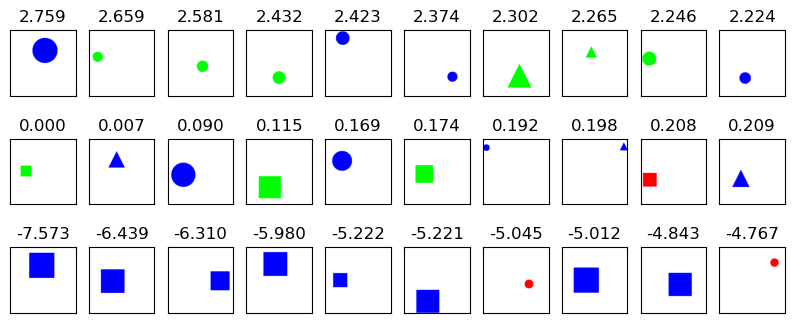

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.4583
	2. azure: 0.2047
	3. cyan: 0.1876
	4. no: 0.1602
	5. have: 0.1128
	6. with: 0.0791
	7. color: 0.0184
	8. four: 0.0183
	9. turn: 0.0151
	10. outline: 0.0126
	11. unrotate: 0.0109
	12. green: 0.0084
	13. up: 0.0079
	14. is: 0.0071
	15. lime: 0.0049
	16. olive: 0.0003
	17. circular: 0.0000
	18. quadratic: 0.0000
	19. triangular: 0.0000
	20. red: 0.0000
	21. crimson: 0.0000
	22. scarlet: 0.0000
	23. <pad>: 0.0000
	24. round: 0.0000
	25. rotate: 0.0000
	26. bottom: 0.0000
	27. position: 0.0000
	28. unturn: 0.0000
	29. picture: 0.0000
	30. background: 0.0000
	31. white: 0.0000
	32. image: 0.0000
	33. fix: 0.0000
	34. the: 0.0000
	35. figure: 0.0000
	36. transparent: 0.0000
	37. right: 0.0000
	38. that: 0.0000
	39. form: 0.0000
	40. shade: 0.0000
	41. static: 0.0000
	42. solid: 0.0000
	43. left: 0.00

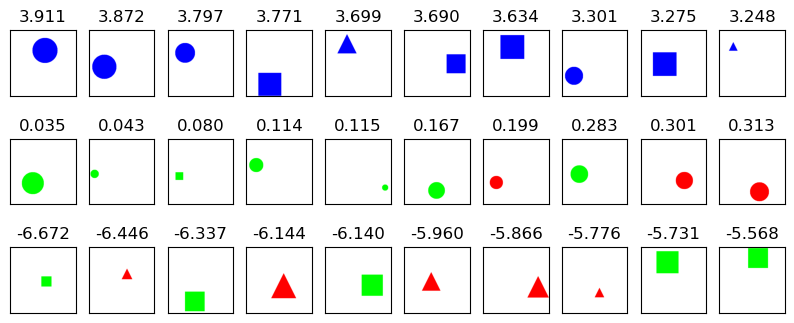

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.1577
	2. triangular: 0.1162
	3. quadratic: 0.0987
	4. with: 0.0697
	5. no: 0.0632
	6. unrotate: 0.0396
	7. in: 0.0360
	8. static: 0.0330
	9. have: 0.0318
	10. turn: 0.0313
	11. rotate: 0.0285
	12. azure: 0.0281
	13. up: 0.0271
	14. is: 0.0223
	15. color: 0.0165
	16. white: 0.0156
	17. figure: 0.0149
	18. shape: 0.0149
	19. form: 0.0146
	20. unturn: 0.0145
	21. bottom: 0.0136
	22. outline: 0.0131
	23. right: 0.0101
	24. crimson: 0.0100
	25. blue: 0.0069
	26. blank: 0.0028
	27. canvas: 0.0019
	28. cyan: 0.0017
	29. picture: 0.0015
	30. locate: 0.0005
	31. fix: 0.0003
	32. position: 0.0001
	33. transparent: 0.0000
	34. olive: 0.0000
	35. circular: 0.0000
	36. round: 0.0000
	37. <pad>: 0.0000
	38. three: 0.0000
	39. red: 0.0000
	40. angle: 0.0000
	41. lime: 0.0000
	42. solid: 0.0000
	43. left: 0.0000
	4

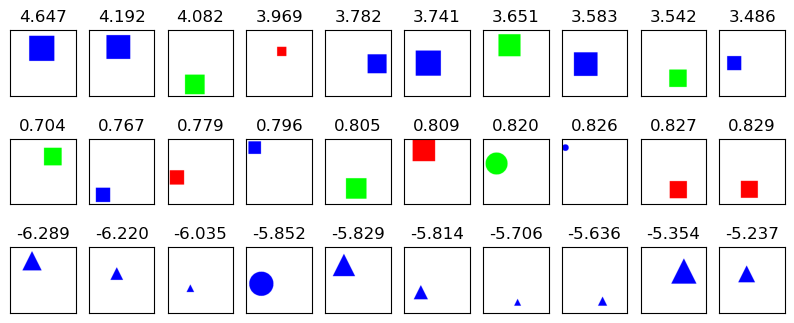

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. olive: 0.1931
	2. three: 0.1619
	3. have: 0.1377
	4. crimson: 0.1361
	5. green: 0.1352
	6. lime: 0.1232
	7. rotate: 0.1230
	8. the: 0.0924
	9. turn: 0.0821
	10. with: 0.0811
	11. no: 0.0792
	12. four: 0.0761
	13. scarlet: 0.0732
	14. photo: 0.0647
	15. in: 0.0617
	16. is: 0.0596
	17. canvas: 0.0560
	18. outline: 0.0498
	19. quadratic: 0.0468
	20. azure: 0.0425
	21. this: 0.0388
	22. that: 0.0333
	23. bottom: 0.0321
	24. static: 0.0300
	25. picture: 0.0295
	26. shape: 0.0291
	27. shade: 0.0247
	28. right: 0.0213
	29. background: 0.0197
	30. image: 0.0192
	31. cyan: 0.0184
	32. unrotate: 0.0160
	33. unturn: 0.0130
	34. form: 0.0125
	35. transparent: 0.0122
	36. round: 0.0118
	37. white: 0.0051
	38. locate: 0.0043
	39. blue: 0.0039
	40. color: 0.0019
	41. position: 0.0016
	42. up: 0.0002
	43. triangular: 0.000

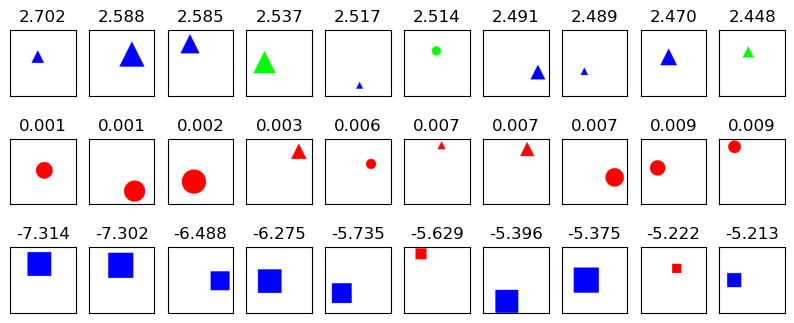

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. outline: 0.1438
	2. olive: 0.1413
	3. color: 0.1291
	4. is: 0.1229
	5. locate: 0.1205
	6. right: 0.1193
	7. image: 0.1084
	8. lime: 0.1083
	9. green: 0.1069
	10. white: 0.1057
	11. circular: 0.0906
	12. bottom: 0.0896
	13. picture: 0.0820
	14. turn: 0.0795
	15. round: 0.0762
	16. this: 0.0715
	17. static: 0.0653
	18. solid: 0.0650
	19. position: 0.0647
	20. in: 0.0635
	21. with: 0.0625
	22. background: 0.0605
	23. canvas: 0.0568
	24. blank: 0.0558
	25. transparent: 0.0553
	26. left: 0.0551
	27. rotate: 0.0534
	28. unturn: 0.0532
	29. angle: 0.0494
	30. that: 0.0491
	31. figure: 0.0472
	32. unrotate: 0.0448
	33. fix: 0.0437
	34. three: 0.0437
	35. blue: 0.0434
	36. up: 0.0352
	37. corner: 0.0319
	38. photo: 0.0306
	39. shape: 0.0280
	40. the: 0.0275
	41. quadratic: 0.0232
	42. crimson: 0.0214
	43. shade: 0.0

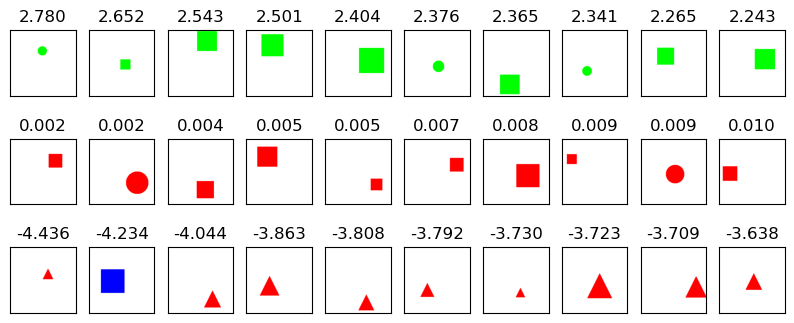

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.2064
	2. corner: 0.1782
	3. angle: 0.1664
	4. quadratic: 0.1520
	5. position: 0.1422
	6. white: 0.1417
	7. fix: 0.1260
	8. static: 0.1201
	9. left: 0.1189
	10. image: 0.1063
	11. in: 0.0986
	12. red: 0.0957
	13. circular: 0.0914
	14. background: 0.0843
	15. rotate: 0.0799
	16. picture: 0.0769
	17. figure: 0.0763
	18. blank: 0.0760
	19. transparent: 0.0754
	20. unturn: 0.0730
	21. turn: 0.0729
	22. solid: 0.0726
	23. color: 0.0723
	24. round: 0.0712
	25. canvas: 0.0691
	26. unrotate: 0.0637
	27. right: 0.0573
	28. scarlet: 0.0515
	29. is: 0.0451
	30. outline: 0.0371
	31. olive: 0.0323
	32. up: 0.0322
	33. four: 0.0291
	34. locate: 0.0254
	35. bottom: 0.0215
	36. shape: 0.0175
	37. with: 0.0086
	38. form: 0.0047
	39. crimson: 0.0017
	40. that: 0.0002
	41. three: 0.0000
	42. the: 0.0000
	43. phot

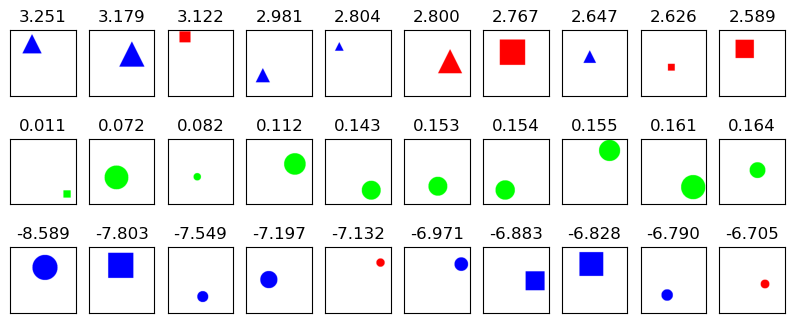

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. no: 0.2840
	2. have: 0.2450
	3. azure: 0.2319
	4. cyan: 0.2212
	5. blue: 0.1719
	6. with: 0.1113
	7. green: 0.0818
	8. lime: 0.0688
	9. olive: 0.0574
	10. is: 0.0514
	11. outline: 0.0360
	12. four: 0.0333
	13. turn: 0.0258
	14. crimson: 0.0193
	15. rotate: 0.0061
	16. this: 0.0028
	17. color: 0.0016
	18. right: 0.0015
	19. bottom: 0.0010
	20. in: 0.0000
	21. circular: 0.0000
	22. quadratic: 0.0000
	23. red: 0.0000
	24. triangular: 0.0000
	25. scarlet: 0.0000
	26. round: 0.0000
	27. <pad>: 0.0000
	28. picture: 0.0000
	29. position: 0.0000
	30. unturn: 0.0000
	31. static: 0.0000
	32. unrotate: 0.0000
	33. background: 0.0000
	34. the: 0.0000
	35. figure: 0.0000
	36. that: 0.0000
	37. form: 0.0000
	38. white: 0.0000
	39. image: 0.0000
	40. fix: 0.0000
	41. transparent: 0.0000
	42. left: 0.0000
	43. three: 0.000

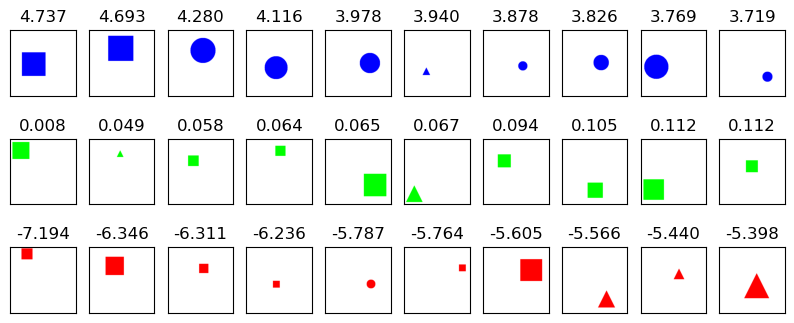

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. round: 0.1384
	2. circular: 0.0876
	3. four: 0.0706
	4. is: 0.0692
	5. that: 0.0668
	6. form: 0.0654
	7. three: 0.0636
	8. bottom: 0.0609
	9. canvas: 0.0604
	10. the: 0.0497
	11. crimson: 0.0407
	12. locate: 0.0402
	13. left: 0.0323
	14. white: 0.0322
	15. photo: 0.0288
	16. shade: 0.0259
	17. position: 0.0228
	18. background: 0.0220
	19. image: 0.0213
	20. with: 0.0207
	21. shape: 0.0203
	22. transparent: 0.0195
	23. picture: 0.0174
	24. right: 0.0171
	25. color: 0.0162
	26. in: 0.0156
	27. this: 0.0139
	28. static: 0.0118
	29. lime: 0.0096
	30. figure: 0.0083
	31. outline: 0.0062
	32. scarlet: 0.0060
	33. red: 0.0060
	34. blank: 0.0053
	35. fix: 0.0048
	36. unturn: 0.0036
	37. green: 0.0012
	38. olive: 0.0010
	39. solid: 0.0009
	40. up: 0.0008
	41. rotate: 0.0006
	42. no: 0.0005
	43. unrotate: 0.0002
	44.

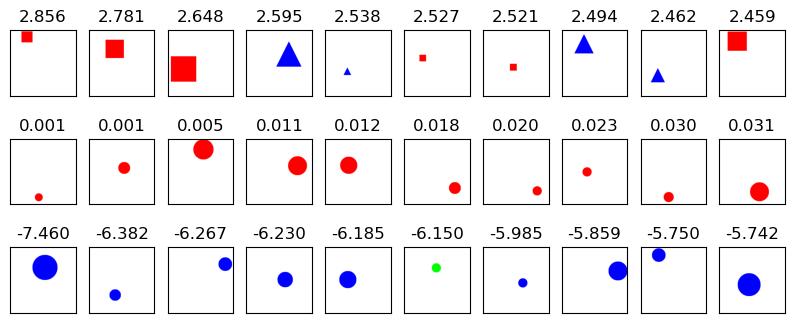

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2150
	2. cyan: 0.1631
	3. blue: 0.1479
	4. quadratic: 0.0996
	5. have: 0.0988
	6. turn: 0.0924
	7. no: 0.0765
	8. with: 0.0563
	9. unrotate: 0.0452
	10. rotate: 0.0424
	11. green: 0.0244
	12. outline: 0.0202
	13. olive: 0.0109
	14. up: 0.0108
	15. in: 0.0071
	16. four: 0.0053
	17. lime: 0.0032
	18. right: 0.0001
	19. circular: 0.0000
	20. triangular: 0.0000
	21. crimson: 0.0000
	22. red: 0.0000
	23. scarlet: 0.0000
	24. unturn: 0.0000
	25. is: 0.0000
	26. static: 0.0000
	27. fix: 0.0000
	28. round: 0.0000
	29. <pad>: 0.0000
	30. position: 0.0000
	31. bottom: 0.0000
	32. picture: 0.0000
	33. white: 0.0000
	34. transparent: 0.0000
	35. background: 0.0000
	36. image: 0.0000
	37. color: 0.0000
	38. that: 0.0000
	39. form: 0.0000
	40. figure: 0.0000
	41. the: 0.0000
	42. solid: 0.0000
	43. shape: 0.000

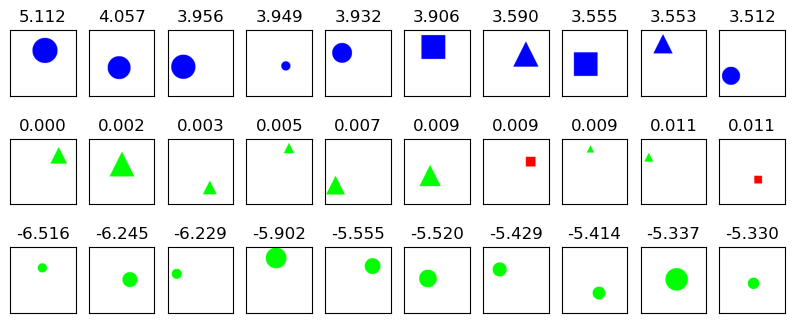

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. up: 0.2663
	2. figure: 0.2269
	3. blank: 0.2114
	4. form: 0.2029
	5. fix: 0.1872
	6. unrotate: 0.1585
	7. position: 0.1521
	8. left: 0.1171
	9. circular: 0.0928
	10. locate: 0.0923
	11. four: 0.0841
	12. color: 0.0828
	13. angle: 0.0784
	14. transparent: 0.0777
	15. triangular: 0.0716
	16. in: 0.0635
	17. corner: 0.0590
	18. bottom: 0.0499
	19. picture: 0.0388
	20. white: 0.0341
	21. shape: 0.0321
	22. the: 0.0263
	23. with: 0.0253
	24. right: 0.0251
	25. round: 0.0232
	26. is: 0.0190
	27. cyan: 0.0145
	28. turn: 0.0115
	29. static: 0.0113
	30. blue: 0.0081
	31. shade: 0.0072
	32. azure: 0.0061
	33. scarlet: 0.0059
	34. outline: 0.0048
	35. rotate: 0.0045
	36. red: 0.0030
	37. unturn: 0.0030
	38. solid: 0.0020
	39. canvas: 0.0012
	40. image: 0.0012
	41. three: 0.0010
	42. lime: 0.0004
	43. crimson: 0.0002


IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)